# Download dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Visualizzazione e splittaggio dataset (80-20)


In [2]:
import numpy as np 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
counter = CountVectorizer(lowercase=True, ngram_range= (1,2), tokenizer=token.tokenize)

In [30]:
train = pd.read_csv("/content/drive/MyDrive/Colab/train.tsv", sep="\t")
test = pd.read_csv("/content/drive/MyDrive/Colab/test.tsv", sep="\t")
train = train[['Phrase', 'Sentiment']]
train.head()

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


# Preprocessing

In [31]:
import nltk
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize.treebank import TreebankWordDetokenizer


stemmer = PorterStemmer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

#lower case for each phrase
train['Phrase']= train['Phrase'].apply(lambda x: x.lower())

#lemmization
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in token.tokenize(text)]

#stemming
def stem_text(text):
    return [stemmer.stem(w) for w in token.tokenize(text)]

#stop word removal
def stop_word_removing(text):
    stopwords = nltk.corpus.stopwords.words('english')
    return [w for w in token.tokenize(text) if not w in stopwords]

#detokenization
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)


train["Phrase"] = train.Phrase.apply(stop_word_removing)
train["Phrase"] = train.Phrase.apply(detokenize)
train["Phrase"] = train.Phrase.apply(lemmatize_text)
#train["Phrase"] = train.Phrase.apply(stem_text)
train["Phrase"] = train.Phrase.apply(detokenize)


test["Phrase"] = test.Phrase.apply(stop_word_removing)
test["Phrase"] = test.Phrase.apply(detokenize)
test["Phrase"] = test.Phrase.apply(lemmatize_text)
#test["Phrase"] = test.Phrase.apply(stem_text)
test["Phrase"] = test.Phrase.apply(detokenize)


print(train.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                                              Phrase  Sentiment
0  a series of escapade demonstrating the adage t...          1
1  a series of escapade demonstrating the adage t...          2
2                                           a series          2
3                                                  a          2
4                                             series          2


 # BoW

fit_transform: Learn the vocabulary dictionary and return document-term matrix.

In [17]:
text_counter = counter.fit_transform(train['Phrase'])

In [18]:
test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing mostly routine effort
1,156062,8545,An intermittently pleasing mostly routine effort
2,156063,8545,An
3,156064,8545,intermittently pleasing mostly routine effort
4,156065,8545,intermittently pleasing mostly routine


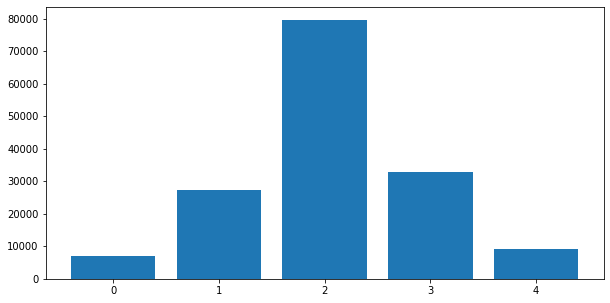

In [19]:
import matplotlib.pyplot as plt
a = train.Sentiment.value_counts()
a = pd.DataFrame(a)
a['Rating'] = a.index
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(height='Sentiment', x='Rating', data=a)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
train, val, label_train, label_val = train_test_split(text_counter, train['Sentiment'], test_size = 0.2)
print(train.shape)
print(val.shape)

(124848, 78531)
(31212, 78531)


# Creazione dei modelli

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC

MNB = MultinomialNB()
MNB.fit(train, label_train)

SGDC = SGDClassifier()
SGDC.fit(train, label_train)

LSVC = LinearSVC()
LSVC.fit(train, label_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

# Valutazione

In [22]:
from sklearn import metrics

accuracy_score_mdb = metrics.accuracy_score(MNB.predict(val), label_val)
print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mdb*100))+'%')

accuracy_score_lsvc = metrics.accuracy_score(LSVC.predict(val), label_val)
print('accuracy_score_lsvc = '+str('{:4.2f}'.format(accuracy_score_lsvc*100))+'%')

accuracy_score_sgdc = metrics.accuracy_score(SGDC.predict(val), label_val)
print('accuracy_score_sgdc = '+str('{:4.2f}'.format(accuracy_score_sgdc*100))+'%')

accuracy_score_mnb = 61.61%
accuracy_score_lsvc = 64.80%
accuracy_score_sgdc = 63.30%


In [23]:
test_counter = counter.transform(test['Phrase'])

predictions_test = MNB.predict(test_counter)
test_id = test['PhraseId']

submission = pd.DataFrame(list(zip(test_id, predictions_test)),
               columns =['PhraseId', 'Sentiment'])
submission.head(20)

submission.to_csv('/content/drive/MyDrive/Colab/submission_MultinomialNB.csv', index=False)

In [24]:
predictions_test = SGDC.predict(test_counter)
test_id = test['PhraseId']

submission = pd.DataFrame(list(zip(test_id, predictions_test)),
               columns =['PhraseId', 'Sentiment'])
submission.head(20)

submission.to_csv('/content/drive/MyDrive/Colab/submission_SGDC.csv', index=False)

In [25]:
predictions_test = LSVC.predict(test_counter)
test_id = test['PhraseId']

submission = pd.DataFrame(list(zip(test_id, predictions_test)),
               columns =['PhraseId', 'Sentiment'])
submission.head(20)

submission.to_csv('/content/drive/MyDrive/Colab/submission_LSVC.csv', index=False)

These are various tentatives done using different configurations of preprocessing step. The accuracy AVG is 60%.

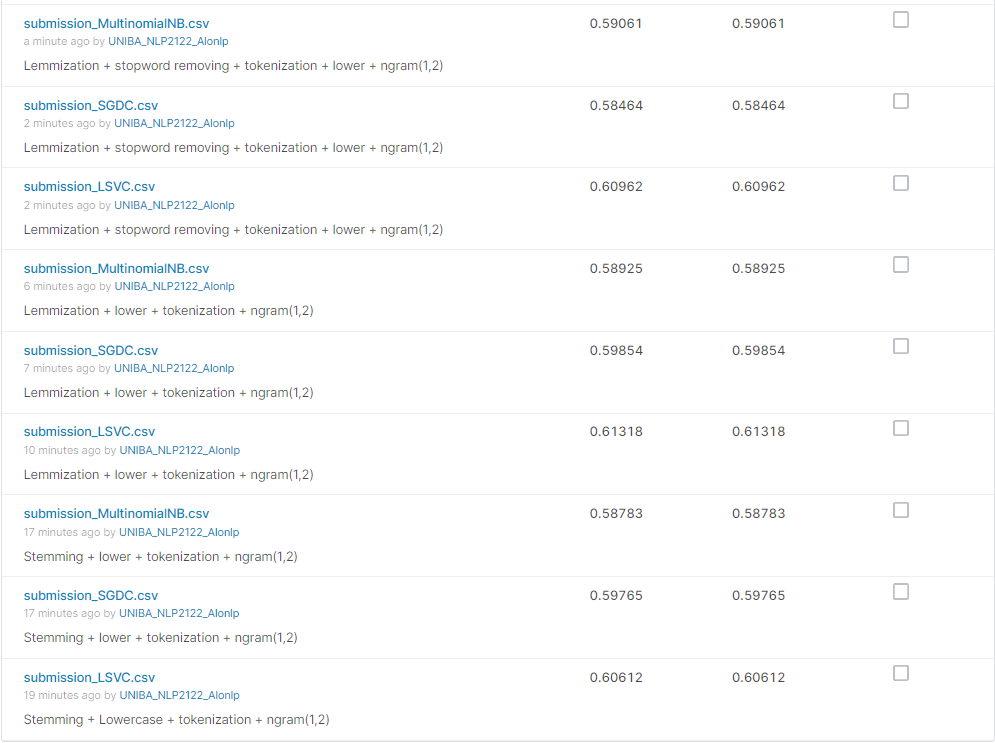